In [46]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import spacy
#import community as community_louvain
from community import community_louvain

In [47]:
nlp = spacy.load("en_core_web_sm")

In [48]:
#load preprocessed data
preprocessed_data = pd.read_csv('Gaza_before_conflict_preprocessed.csv')
preprocessed_data.head()

,article_title,author,published_time,article_text
0,First Saudi ambassador to Palestine arrives in...,By Xinhua,"Published: Sep 27, 2023 09:58 AM",Saudi Arabia ambassador to Palestine Naif bin ...
1,"1,100 Gazan kidney patients facing drug shorta...",By Xinhua,"Published: Sep 21, 2023 11:02 AM",A young Palestine patient receives treatment a...
2,Mideast in Pictures: It's back-to-school day i...,By Xinhua,"Published: Aug 27, 2023 01:21 PM",Palestine students are pictured in a classroom...
3,Palestinians injured in clashes with Israeli s...,By Xinhua,"Published: Aug 22, 2023 11:05 AM",Palestine protesters hurl stones at Israel sol...
4,Palestinian students participate in digital ex...,By Xinhua,"Published: Aug 17, 2023 10:13 AM",A Palestine student participates in a digital ...


In [49]:
entities = [
    "Palestinian-Israeli Conflict", "Israel", "Gaza", "Palestine", "US",
    "China", "West", "Saudi Arabia", "West Bank", "Middle East",
    "Houthi", "Hamas", "Rafah", "UN", "Wang Yi",
    "Joe Biden", "Antony Blinken", "Zhang Jun", "Xi Jinping", "Benjamin Netanyahu",
    "Antonio Guterres", "EU", "EU Union"
] #EU Union outlier make the visualization bad

# Relationship with co-occurence based in same sentence

In [50]:
#initialize graph
G = nx.Graph()

#add nodes for each entity
for entity in entities:
    G.add_node(entity)

In [51]:
co_occurrence = defaultdict(int)

In [52]:
#iterate through the articles and process with SpaCy to get sentences
for article in preprocessed_data['article_text']:
    doc = nlp(article)
    sentences = [sent.text for sent in doc.sents]
    #print(sentences)

    #iterate through each sentence in the article
    for sentence in sentences:
        present_entities = [entity for entity in entities if entity in sentence]
        #print(present_entities)
        for i in range(len(present_entities)):
            for j in range(i + 1, len(present_entities)):
                co_occurrence[(present_entities[i], present_entities[j])] += 1
                #print(co_occurrence)

In [53]:
co_occurrence

defaultdict(int,
            {('Palestine', 'West'): 18,
             ('Palestine', 'Saudi Arabia'): 10,
             ('Palestine', 'West Bank'): 18,
             ('West', 'Saudi Arabia'): 2,
             ('West', 'West Bank'): 18,
             ('Saudi Arabia', 'West Bank'): 2,
             ('Israel', 'Saudi Arabia'): 7,
             ('Israel', 'Palestine'): 83,
             ('Israel', 'Gaza'): 78,
             ('Israel', 'West'): 11,
             ('Israel', 'West Bank'): 11,
             ('Gaza', 'Palestine'): 96,
             ('Gaza', 'West'): 8,
             ('Gaza', 'West Bank'): 8,
             ('Palestine', 'Hamas'): 10,
             ('Israel', 'Hamas'): 8,
             ('Gaza', 'Hamas'): 9,
             ('Israel', 'UN'): 6,
             ('Gaza', 'UN'): 8,
             ('Palestine', 'UN'): 16,
             ('West', 'UN'): 2,
             ('West Bank', 'UN'): 1,
             ('Gaza', 'Saudi Arabia'): 1,
             ('Saudi Arabia', 'Hamas'): 1,
             ('Gaza', 'Rafah'): 12,

In [54]:
#define a threshold for edge weights for visualization purposes
weight_threshold = 0

In [55]:
#add edges with weights to the graph, filtering by the threshold
selected_edges = []
for (entity1, entity2), weight in co_occurrence.items():
    if weight >= weight_threshold:
        G.add_edge(entity1, entity2, weight=weight)
        selected_edges.append((entity1, entity2, weight))

In [56]:
selected_edges

[('Palestine', 'West', 18),
 ('Palestine', 'Saudi Arabia', 10),
 ('Palestine', 'West Bank', 18),
 ('West', 'Saudi Arabia', 2),
 ('West', 'West Bank', 18),
 ('Saudi Arabia', 'West Bank', 2),
 ('Israel', 'Saudi Arabia', 7),
 ('Israel', 'Palestine', 83),
 ('Israel', 'Gaza', 78),
 ('Israel', 'West', 11),
 ('Israel', 'West Bank', 11),
 ('Gaza', 'Palestine', 96),
 ('Gaza', 'West', 8),
 ('Gaza', 'West Bank', 8),
 ('Palestine', 'Hamas', 10),
 ('Israel', 'Hamas', 8),
 ('Gaza', 'Hamas', 9),
 ('Israel', 'UN', 6),
 ('Gaza', 'UN', 8),
 ('Palestine', 'UN', 16),
 ('West', 'UN', 2),
 ('West Bank', 'UN', 1),
 ('Gaza', 'Saudi Arabia', 1),
 ('Saudi Arabia', 'Hamas', 1),
 ('Gaza', 'Rafah', 12),
 ('Palestine', 'Rafah', 5),
 ('Palestine', 'China', 36),
 ('China', 'Saudi Arabia', 8),
 ('Gaza', 'China', 3),
 ('Palestine', 'Xi Jinping', 3),
 ('China', 'Xi Jinping', 2),
 ('Israel', 'China', 13),
 ('Palestine', 'Middle East', 6),
 ('China', 'UN', 4),
 ('Israel', 'Middle East', 6),
 ('China', 'Middle East', 5),
 

In [57]:
#calculate node strength -- the sum of the weights of edges connected to them
node_strength = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes}
max_strength = max(node_strength.values())

In [58]:
#normalize node sizes based on their strength
node_sizes = [node_strength[node] / max_strength * 1000 for node in G.nodes]

In [59]:
from community import community_louvain

In [60]:
#apply the Louvain method for community detection
partition = community_louvain.best_partition(G, weight='weight')

In [61]:
partition

{'Palestinian-Israeli Conflict': 0,
 'Israel': 2,
 'Gaza': 2,
 'Palestine': 2,
 'US': 2,
 'China': 5,
 'West': 8,
 'Saudi Arabia': 5,
 'West Bank': 8,
 'Middle East': 5,
 'Houthi': 10,
 'Hamas': 2,
 'Rafah': 2,
 'UN': 5,
 'Wang Yi': 1,
 'Joe Biden': 3,
 'Antony Blinken': 4,
 'Zhang Jun': 6,
 'Xi Jinping': 5,
 'Benjamin Netanyahu': 2,
 'Antonio Guterres': 7,
 'EU': 9,
 'EU Union': 11}

In [62]:
#add the community information to the graph
for node, community in partition.items():
    G.nodes[node]['community'] = community

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


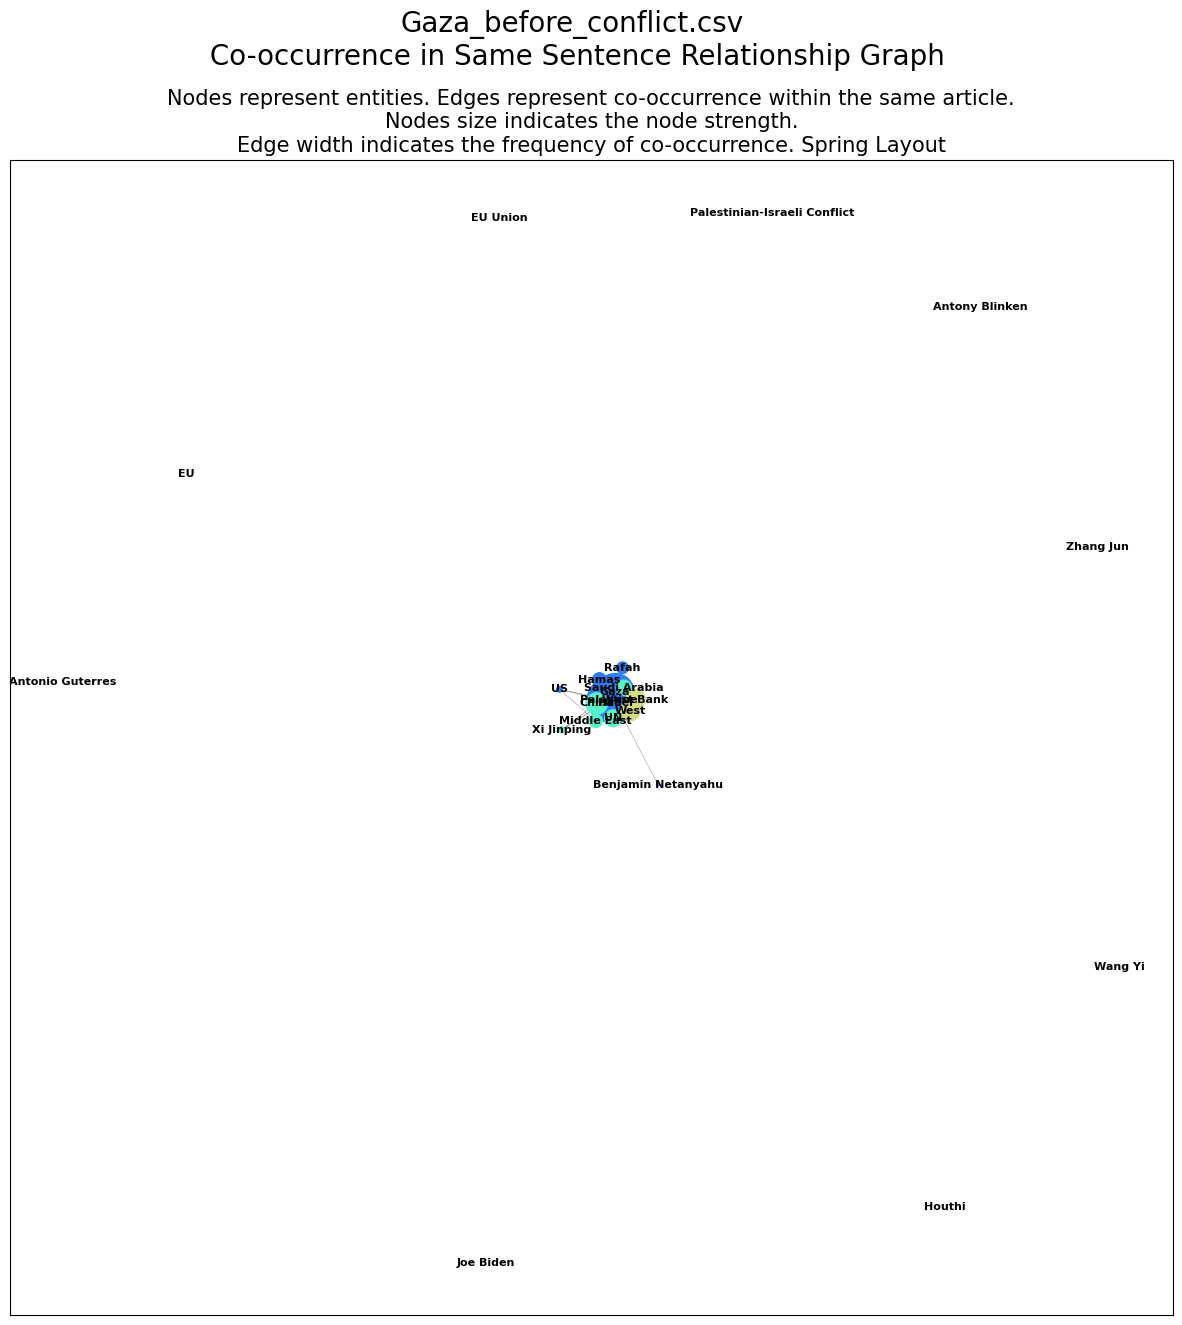

In [63]:
#draw the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)

#get the community color map
communities = set(partition.values())
colors = [plt.cm.rainbow(i / len(communities)) for i in range(len(communities))]
node_colors = [colors[partition[node]] for node in G.nodes]

#draw nodes with community colors
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.rainbow, node_color=node_colors)

#draw edges with normalized weights
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
max_weight = max(weights)
min_width = 0.2
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')

#draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

#labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

#title
plt.suptitle("Gaza_before_conflict.csv\n Co-occurrence in Same Sentence Relationship Graph", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nNodes size indicates the node strength.\nEdge width indicates the frequency of co-occurrence. Spring Layout", fontsize=15)

plt.show()

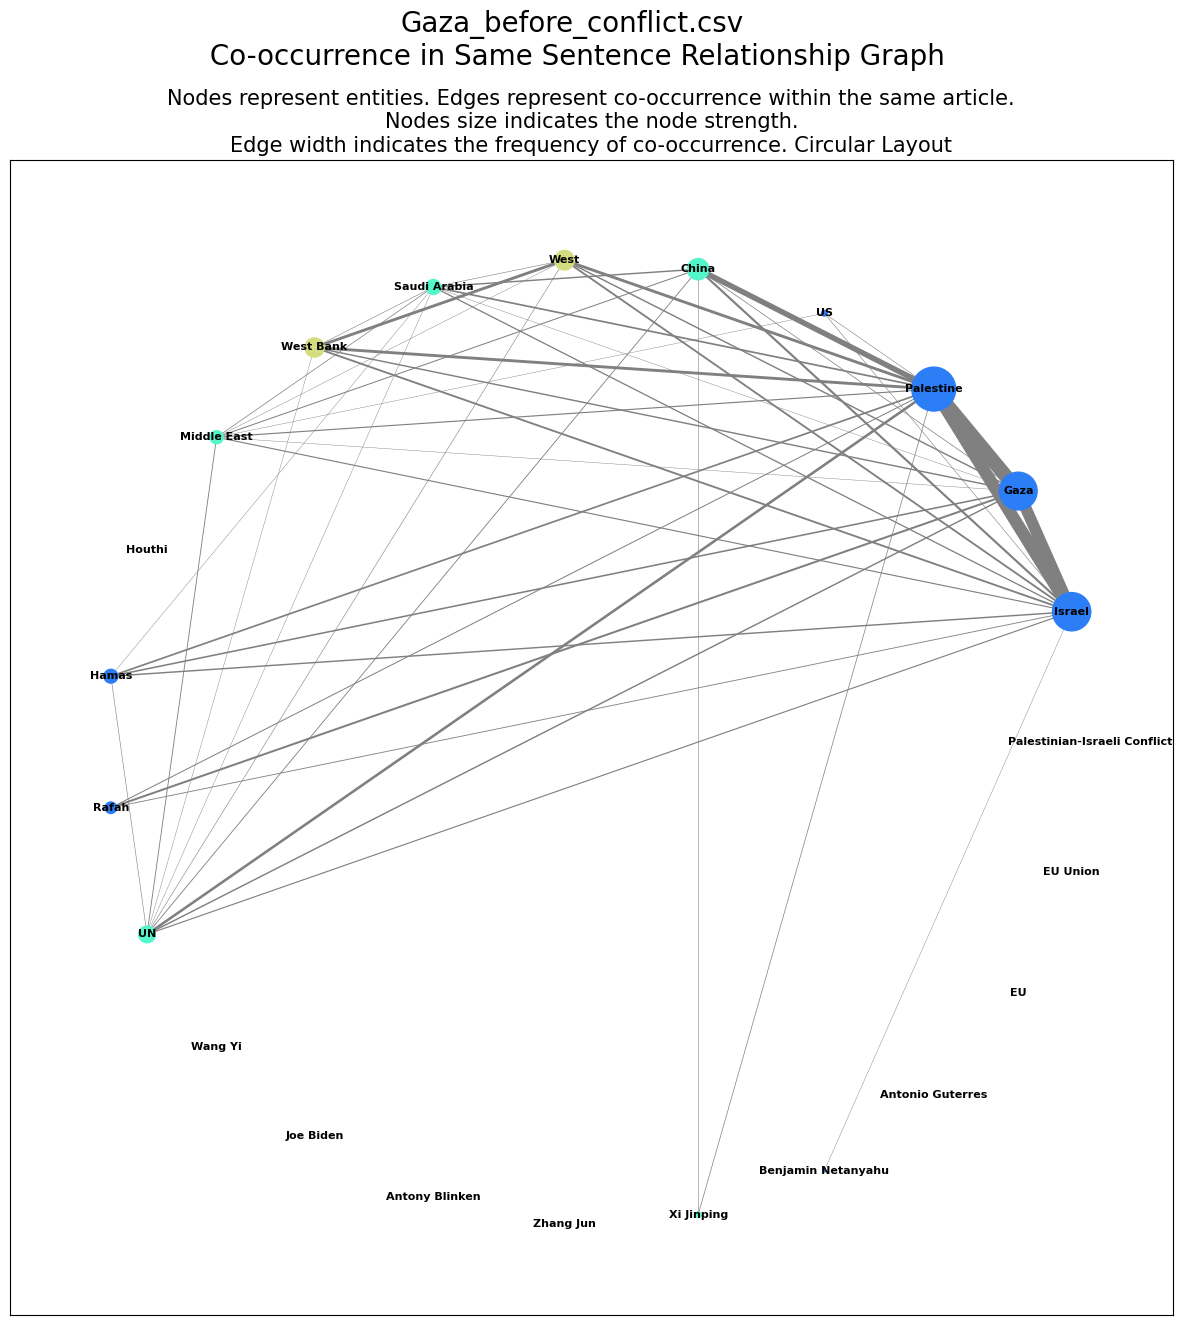

In [64]:
#draw the graph
plt.figure(figsize=(15, 15))
pos = nx.circular_layout(G)

#get the community color map
communities = set(partition.values())
colors = [plt.cm.rainbow(i / len(communities)) for i in range(len(communities))]
node_colors = [colors[partition[node]] for node in G.nodes]

#draw nodes with community colors
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.rainbow, node_color=node_colors)

#draw edges with normalized weights
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
max_weight = max(weights)
min_width = 0.2
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

#labels = nx.get_edge_attributes(G, 'weight')
#x.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

#add title and show plot
plt.suptitle("Gaza_before_conflict.csv\n Co-occurrence in Same Sentence Relationship Graph", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nNodes size indicates the node strength.\nEdge width indicates the frequency of co-occurrence. Circular Layout", fontsize=15)

plt.show()

# Relationship with co-occurence based in same article

In [65]:
#initialize graph
G = nx.Graph()

#add nodes for each entity
for entity in entities:
    G.add_node(entity)

In [66]:
co_occurrence = defaultdict(int)

#iterate through each article in the preprocessed dataset
for article in preprocessed_data['article_text']:
    #find all entities present in the article
    present_entities = [entity for entity in entities if entity in article]
    #print(present_entities)

    #track co-occurrences within the article
    for i in range(len(present_entities)):
        for j in range(i + 1, len(present_entities)):
            co_occurrence[(present_entities[i], present_entities[j])] += 1
            #print(co_occurrence)

In [67]:
co_occurrence

defaultdict(int,
            {('Israel', 'Gaza'): 14,
             ('Israel', 'Palestine'): 14,
             ('Israel', 'West'): 6,
             ('Israel', 'Saudi Arabia'): 5,
             ('Israel', 'West Bank'): 6,
             ('Gaza', 'Palestine'): 23,
             ('Gaza', 'West'): 6,
             ('Gaza', 'Saudi Arabia'): 6,
             ('Gaza', 'West Bank'): 6,
             ('Palestine', 'West'): 6,
             ('Palestine', 'Saudi Arabia'): 6,
             ('Palestine', 'West Bank'): 6,
             ('West', 'Saudi Arabia'): 3,
             ('West', 'West Bank'): 6,
             ('Saudi Arabia', 'West Bank'): 3,
             ('Israel', 'Hamas'): 8,
             ('Gaza', 'Hamas'): 9,
             ('Palestine', 'Hamas'): 9,
             ('Israel', 'UN'): 6,
             ('Gaza', 'UN'): 8,
             ('Palestine', 'UN'): 8,
             ('West', 'UN'): 3,
             ('West Bank', 'UN'): 3,
             ('West', 'Hamas'): 2,
             ('West Bank', 'Hamas'): 2,
           

In [68]:
#define a threshold for edge weights for visualization purposes
weight_threshold = 0

In [69]:
#add edges with weights to the graph, filtering by the threshold
selected_edges = []
for (entity1, entity2), weight in co_occurrence.items():
    if weight >= weight_threshold:
        G.add_edge(entity1, entity2, weight=weight)
        selected_edges.append((entity1, entity2, weight))

In [70]:
selected_edges

[('Israel', 'Gaza', 14),
 ('Israel', 'Palestine', 14),
 ('Israel', 'West', 6),
 ('Israel', 'Saudi Arabia', 5),
 ('Israel', 'West Bank', 6),
 ('Gaza', 'Palestine', 23),
 ('Gaza', 'West', 6),
 ('Gaza', 'Saudi Arabia', 6),
 ('Gaza', 'West Bank', 6),
 ('Palestine', 'West', 6),
 ('Palestine', 'Saudi Arabia', 6),
 ('Palestine', 'West Bank', 6),
 ('West', 'Saudi Arabia', 3),
 ('West', 'West Bank', 6),
 ('Saudi Arabia', 'West Bank', 3),
 ('Israel', 'Hamas', 8),
 ('Gaza', 'Hamas', 9),
 ('Palestine', 'Hamas', 9),
 ('Israel', 'UN', 6),
 ('Gaza', 'UN', 8),
 ('Palestine', 'UN', 8),
 ('West', 'UN', 3),
 ('West Bank', 'UN', 3),
 ('West', 'Hamas', 2),
 ('West Bank', 'Hamas', 2),
 ('Saudi Arabia', 'Hamas', 1),
 ('Gaza', 'Rafah', 5),
 ('Palestine', 'Rafah', 4),
 ('Gaza', 'China', 3),
 ('Palestine', 'China', 3),
 ('China', 'Saudi Arabia', 3),
 ('Israel', 'US', 2),
 ('Israel', 'China', 2),
 ('Israel', 'Middle East', 3),
 ('Israel', 'Xi Jinping', 1),
 ('Gaza', 'US', 2),
 ('Gaza', 'Middle East', 3),
 ('Gaza

In [71]:
#calculate node strength -- the sum of the weights of edges connected to them
node_strength = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes}
max_strength = max(node_strength.values())

In [72]:
#normalize node sizes based on their strength
node_sizes = [node_strength[node] / max_strength * 1000 for node in G.nodes]

In [73]:
#apply the Louvain method for community detection
partition = community_louvain.best_partition(G, weight='weight')

In [74]:
partition

{'Palestinian-Israeli Conflict': 0,
 'Israel': 2,
 'Gaza': 2,
 'Palestine': 2,
 'US': 4,
 'China': 4,
 'West': 6,
 'Saudi Arabia': 4,
 'West Bank': 6,
 'Middle East': 4,
 'Houthi': 10,
 'Hamas': 2,
 'Rafah': 2,
 'UN': 2,
 'Wang Yi': 1,
 'Joe Biden': 3,
 'Antony Blinken': 5,
 'Zhang Jun': 7,
 'Xi Jinping': 4,
 'Benjamin Netanyahu': 2,
 'Antonio Guterres': 8,
 'EU': 9,
 'EU Union': 11}

In [75]:
#add the community information to the graph
for node, community in partition.items():
    G.nodes[node]['community'] = community

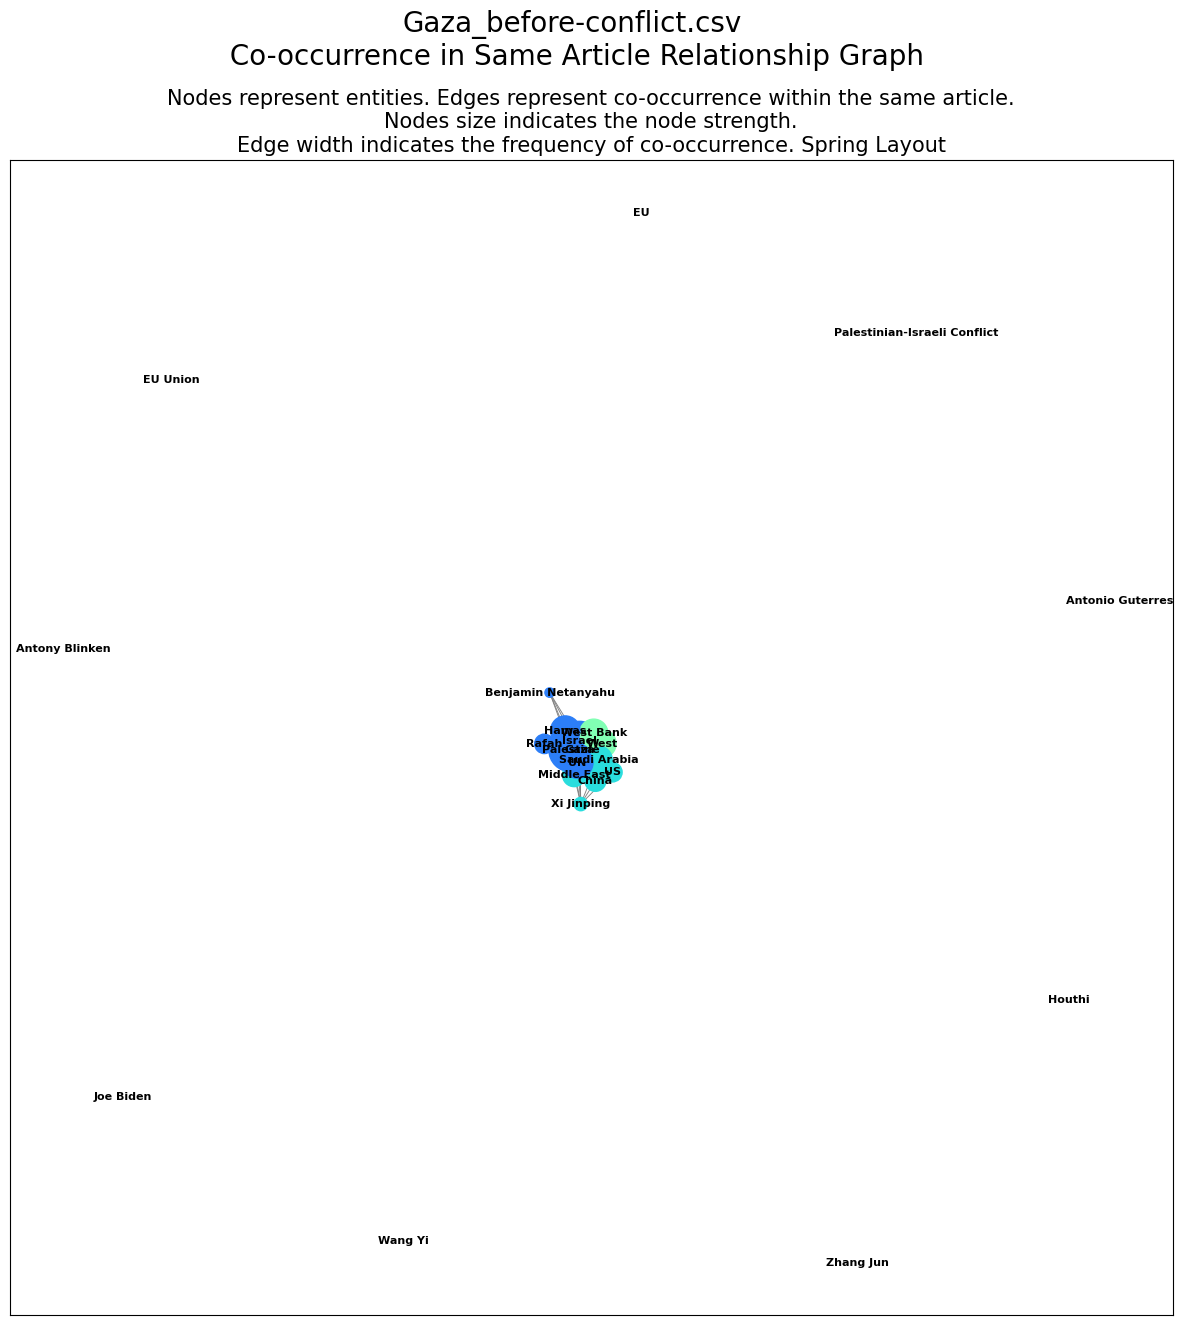

In [76]:
#draw the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)

#get the community color map
communities = set(partition.values())
colors = [plt.cm.rainbow(i / len(communities)) for i in range(len(communities))]
node_colors = [colors[partition[node]] for node in G.nodes]

#draw nodes with community colors
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.rainbow, node_color=node_colors)

#draw edges with normalized weights
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
max_weight = max(weights)
min_width = 0.2
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')

#draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

#labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

#add title and show plot
plt.suptitle("Gaza_before-conflict.csv\n Co-occurrence in Same Article Relationship Graph", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nNodes size indicates the node strength.\nEdge width indicates the frequency of co-occurrence. Spring Layout", fontsize=15)
plt.show()

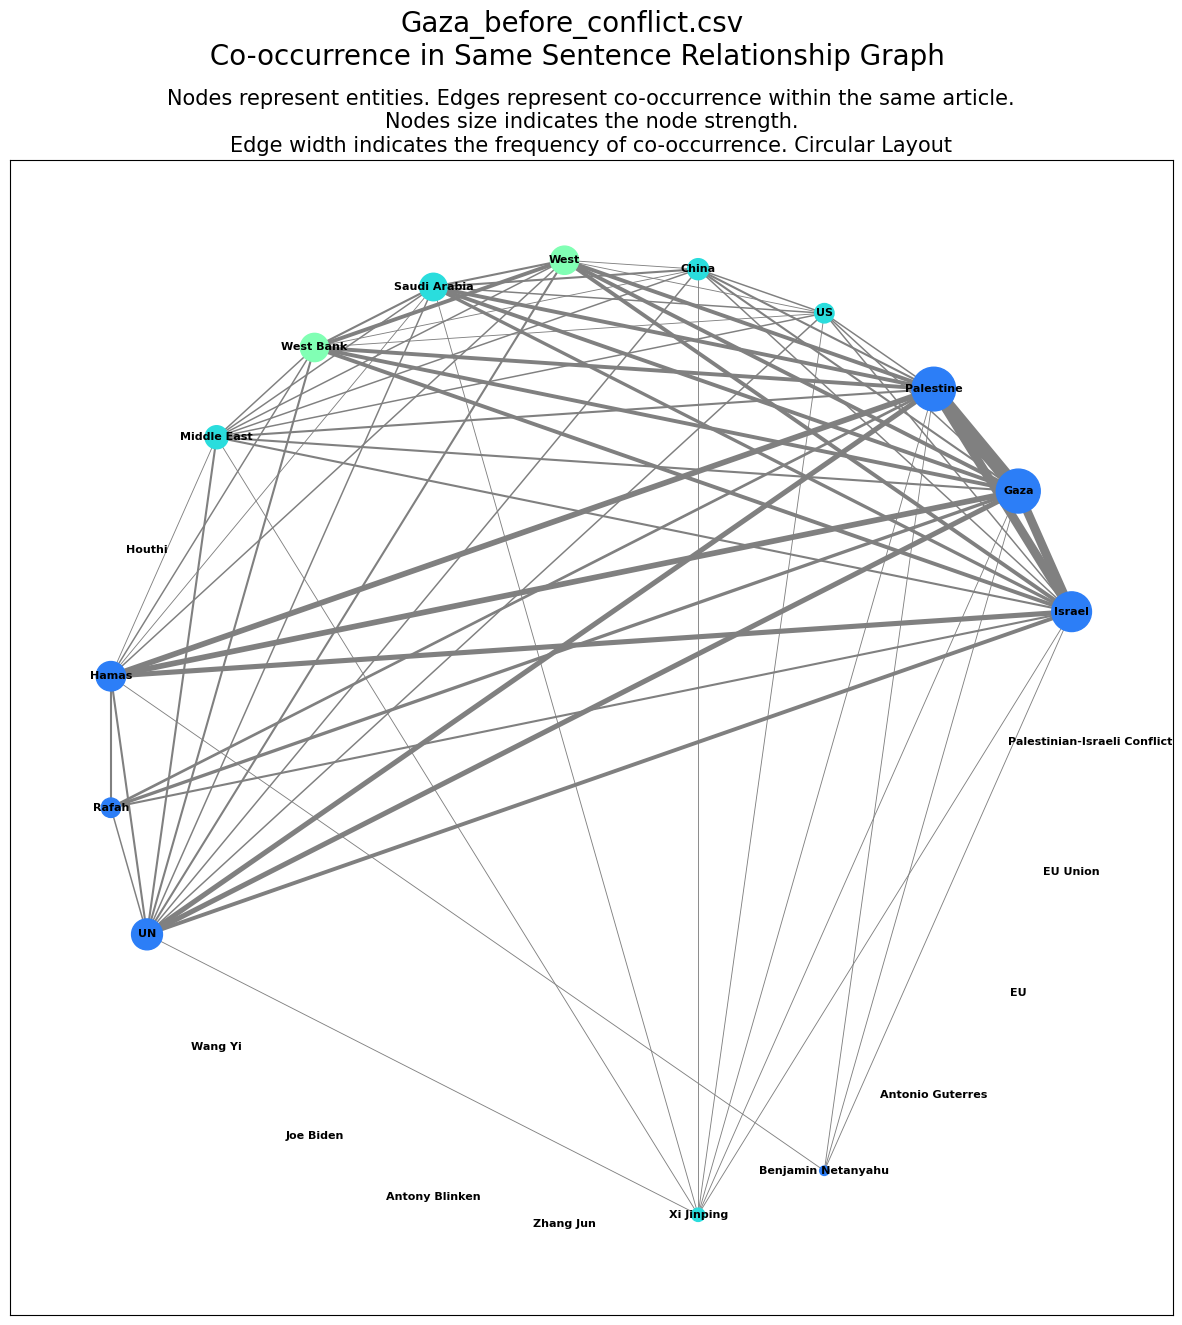

In [77]:
#draw the graph
plt.figure(figsize=(15, 15))
pos = nx.circular_layout(G)

#get the community color map
communities = set(partition.values())
colors = [plt.cm.rainbow(i / len(communities)) for i in range(len(communities))]
node_colors = [colors[partition[node]] for node in G.nodes]

#draw nodes with community colors
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.rainbow, node_color=node_colors)

#draw edges with normalized weights
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
max_weight = max(weights)
min_width = 0.2
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')

#draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

#labels = nx.get_edge_attributes(G, 'weight')
#x.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

#add title and show plot
plt.suptitle("Gaza_before_conflict.csv\n Co-occurrence in Same Sentence Relationship Graph", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nNodes size indicates the node strength.\nEdge width indicates the frequency of co-occurrence. Circular Layout", fontsize=15)
plt.show()